# 데이터 전처리

# 데이터 전처리 preprocessing
- 데이터 클렌징 : 결측치/중복값/이상치 처리
- 데이터 인코딩 : 문자값 수치로 변환(LabelEncoding, OneHotEncoding)
- 데이터 스케일링 : 표준정규화, 최대/최소정규화, RobustScaler
- 특성 공학 :
    - 특성 선택/추출
    - 가공
    - 다항처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 클렌징

In [2]:
# 결측치 처리 simpleimputer
from sklearn.impute import SimpleImputer
data = pd.DataFrame({
    "age": [25, None, 27, None, 30],
    "income": [50000, 60000, None, 52000, 58000]
})

imputer = SimpleImputer()
data_cleaned = pd.DataFrame(imputer.fit_transform(data))
print(data_cleaned)

           0        1
0  25.000000  50000.0
1  27.333333  60000.0
2  27.000000  55000.0
3  27.333333  52000.0
4  30.000000  58000.0


In [7]:
# 이상치 처리 IsolationForest
# -트리기반 이상탐지 기법
from sklearn.ensemble import IsolationForest
X = np.array([[1], [2], [2.5], [3], [100]])
iso = IsolationForest()
pred = iso.fit_predict(X)
print(pred)

X_cleaned = X[pred == 1] # 다 true인 애들만 담겨서 -1 사라짐
print(X_cleaned)

[ 1  1  1  1 -1]
[[1. ]
 [2. ]
 [2.5]
 [3. ]]


# 데이터 인코딩

### Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2])

In [14]:
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터'], dtype='<U4')

In [15]:
# 라벨값 원래 데이터로 복원
encoder.inverse_transform([2,3,1])

array(['믹서', '선풍기', '냉장고'], dtype='<U4')

### One-hot Encoding
범주형 변수마다 하나의 열을 생성하고, 해당 범주에만 1을 표시하는 인코딩
(one vs. rest 또는 one vs. all)


In [18]:
from sklearn.preprocessing import OneHotEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
print(len(items))

# 2차원 데이터로 변환
items = np.array(items).reshape(-1, 1)
print(items.shape)

encoder = OneHotEncoder()
encoder.fit(items)
one_hot_items = encoder.transform(items)


print(encoder.categories_)
print(one_hot_items.toarray())

8
(8, 1)
[array(['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터'], dtype='<U4')]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


## 피처 스케일링과 정규화
머신러닝에서 **피처 스케일링**은 서로 다른 범위를 가지는 데이터를 공통된 기준으로 맞추기 위한 과정이다.

### 표준화 (Standardization)
- **정의**: 평균을 0, 표준편차를 1로 변환하는 방식
- **공식**:
  $$
  z = \frac{x - \mu}{\sigma}
  $$
  여기서 $ \mu $는 평균, $ \sigma $는 표준편차
- **특징**:
  - 데이터가 **정규분포를 따를 때** 효과적
  - **음수 값도 허용**
  - 이상치(outlier)의 영향을 **덜 받음**


### 정규화 (Normalization, Min-Max Scaling)
- **정의**: 데이터를 0과 1 사이로 스케일링
- **공식**:
  $$
  x_{norm} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
  $$
- **특징**:
  - **특정 범위(보통 0~1)**로 제한
  - **이상치에 민감**
  - 거리 기반 알고리즘(k-NN, SVM 등)에 자주 사용

### 로버스트 스케일링 (Robust Scaling)
- **정의**: 중앙값(Median)과 사분위범위(IQR)를 이용한 스케일링
- **공식**:
  $$
  x_{scaled} = \frac{x - \text{Median}}{\text{IQR}}
  $$
  여기서 IQR = Q3 - Q1 (제3사분위수 - 제1사분위수)
- **특징**:
  - **이상치에 강건(Robust)**
  - 중앙값과 IQR 기준 → **데이터 분포 왜곡이 적음**
  - **StandardScaler보다 이상치 영향이 적은 대안**
  - 다양한 분포의 데이터에 적용 가능


In [19]:
# 표준 스케일링
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(iris_df)

iris_scaled_df = pd.DataFrame(standard_scaler.transform(iris_df), columns = iris_df.columns)
iris_scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [24]:
# 최소/ 최대 정규화
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(iris_df)

iris_scaled_df2 = pd.DataFrame(min_max_scaler.transform(iris_df), columns = iris_df.columns)
iris_scaled_df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [26]:
# RobustScaler
# - 이상치가 포함된 경우에 적합
from sklearn.preprocessing import RobustScaler

X = np.array([[10], [12], [14], [100]])

robust_scaler = RobustScaler()
robust_scaler.fit(X)
X_scaled = robust_scaler.transform(X)
X_scaled

array([[-0.125     ],
       [-0.04166667],
       [ 0.04166667],
       [ 3.625     ]])

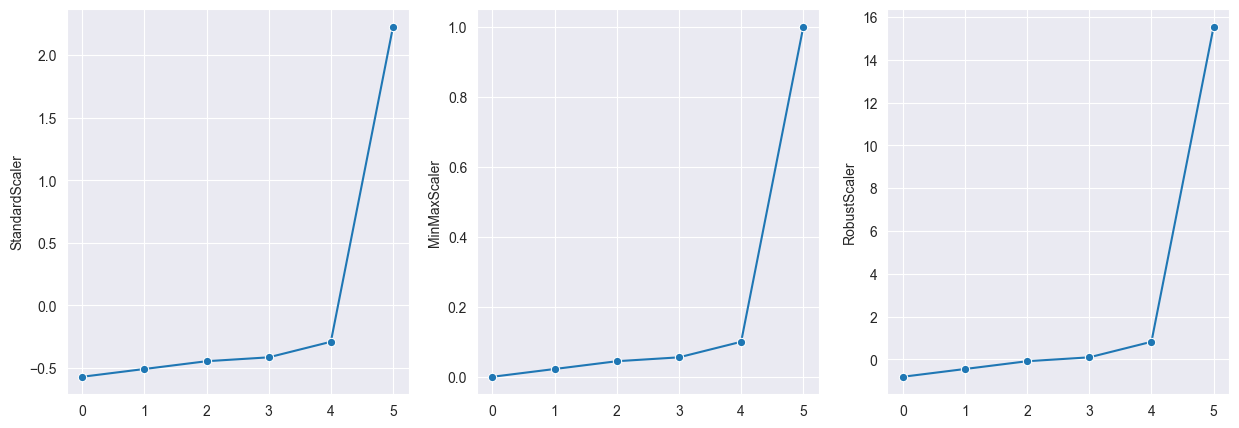

In [30]:
# 이상치가 있는 경우 Scaling 기법 비교
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

df = pd.DataFrame([[10], [12], [14], [15], [19], [100]], columns=['Original'])

# Scaler는 2차원 형태로 줘야한다.
df['StandardScaler'] = StandardScaler().fit_transform(df[['Original']])
df['MinMaxScaler'] = MinMaxScaler().fit_transform(df[['Original']])
df['RobustScaler'] = RobustScaler().fit_transform(df[['Original']])

# 표준화: 이상치 평균/표준편차를 왜곡 경향
sns.lineplot(df['StandardScaler'], ax=ax[0], marker='o')

# 최소최대화 : 이상치와 값이 실제보다 더 작게 치우침
sns.lineplot(df['MinMaxScaler'], ax=ax[1], marker='o')

# Robust 변환 : 중앙값, IQR 기반으로 이상치 영향이 가장 덜함
sns.lineplot(df['RobustScaler'], ax=ax[2], marker='o')
plt.show()
